In [1]:
# Import all the necessary packages: 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV amilile I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from sklearn.ensemble import RandomForestClassifier

# Set style and font size
plt.style.use('seaborn')
sns.set(font_scale=2.5)

# Ignore warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## 1. Learn about Dataset

#### Data Dictionary

* Survived: 0 = No, 1 = Yes
* pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp: # of siblings / spouses aboard the Titanic
* parch: # of parents / children aboard the Titanic
* ticket: Ticket number
* cabin: Cabin number
* embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

### 1.1 Import Data

In [2]:
# Read files
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

### 1.2 Check Null Data
#### Train set

In [3]:
# Display the dimension of the train dataset
df_train.shape

(891, 12)

In [4]:
# Display the first 5 rows of train dataset
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Show the infomation of trainset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Show the descriptive statistics of train dataset
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Sum of null values in train set
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

> The above tables show that there are some missing values in Age, Cabin, and Embarked columns

<AxesSubplot:>

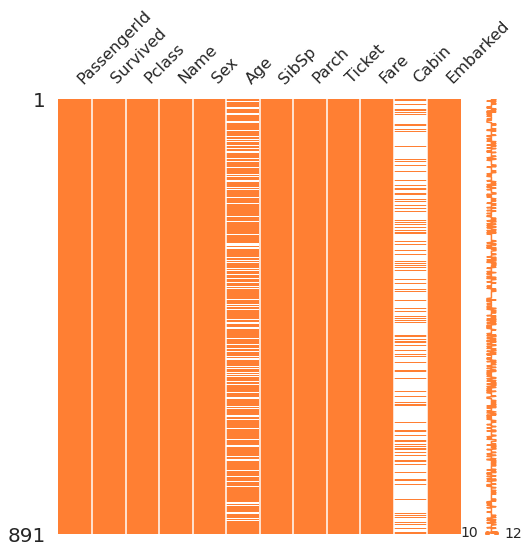

In [8]:
# Show missing values as a matrix
msno.matrix(df=df_train.iloc[:, :], figsize=(8,8), color=(1, 0.5, 0.2))

<AxesSubplot:>

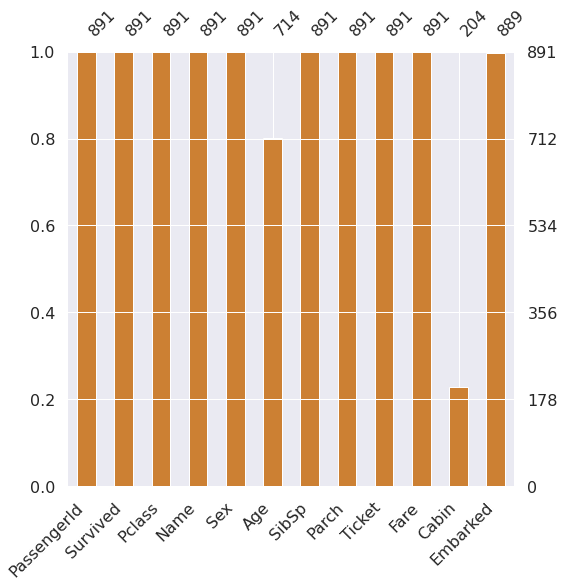

In [9]:
# Show missing values as a bar
msno.bar(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

In [10]:
# Get percentage of NaN value for each column in train set
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


> There are NaN values in Age, Cabin, and Embarked columns in train set
>
> We need to handle those null values

#### Test set

In [11]:
# Display the dimension of the test dataset
df_test.shape

(418, 11)

In [12]:
# Display the top 10 rows of test dataset
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [13]:
# Show information of test set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
# Show the descriptive statistics of test dataset
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
# Sum of null values in train set
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

> The above tables show that there are missing values in Age, Fare, and cabin columns

<AxesSubplot:>

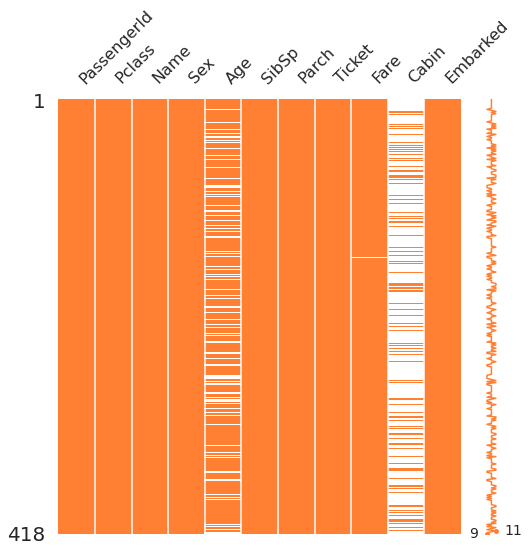

In [16]:
# Show missing values as a matrix
msno.matrix(df=df_test.iloc[:, :], figsize=(8,8), color=(1, 0.5, 0.2))

<AxesSubplot:>

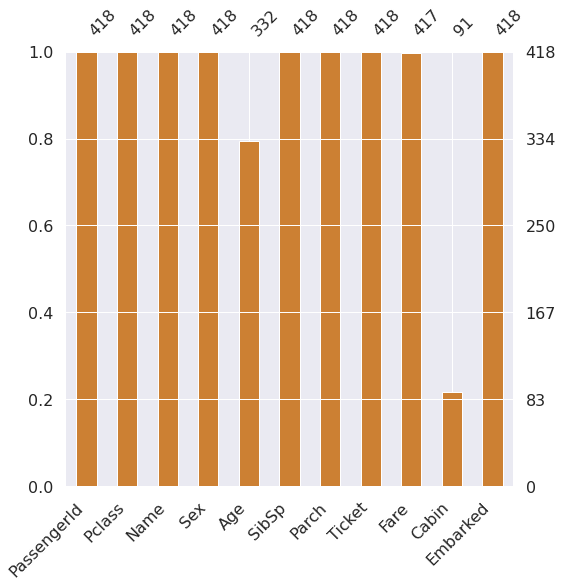

In [17]:
# Show missing values as a bar
msno.bar(df=df_test.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

In [18]:
# Get percentage of NaN value for each column in test set
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


> There are NaN values in Age, Fare, and Cabin columns in test set
>
> We need to handle those null values

## 2. Target Variable: Survived

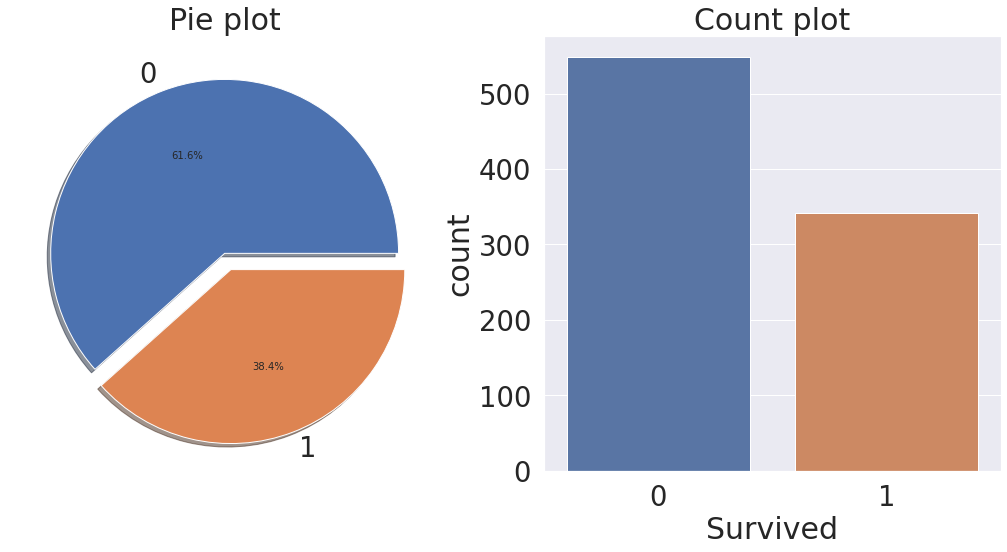

In [19]:
# Create two plots
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Create a pie plot to show percentage of survived and not survived
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot')
ax[0].set_ylabel('')

# Create a bar plot
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot')

# Show plots
plt.show()

In [20]:
# Get the number of people survived and not survived
df_train.value_counts('Survived')

Survived
0    549
1    342
dtype: int64

> The percentage of not survived is higher than survived
>
> We are going to figure out what features would influence the survival rate

## 3. Features - Exploratory Data Analysis (EDA)

### 3.1 Pclass

In [21]:
# Get the number of people in each class
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [22]:
# Get the number of survived people in each class
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [23]:
# Can use crosstab to get the number of survived people in each class
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

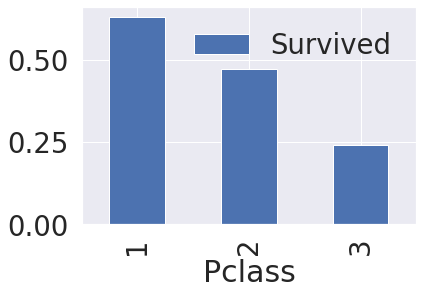

In [24]:
# Show the percentage of survival in each class as a bar chart
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

> The largest percentage of survivors were first class passengers, followed by second class, and finally third class.

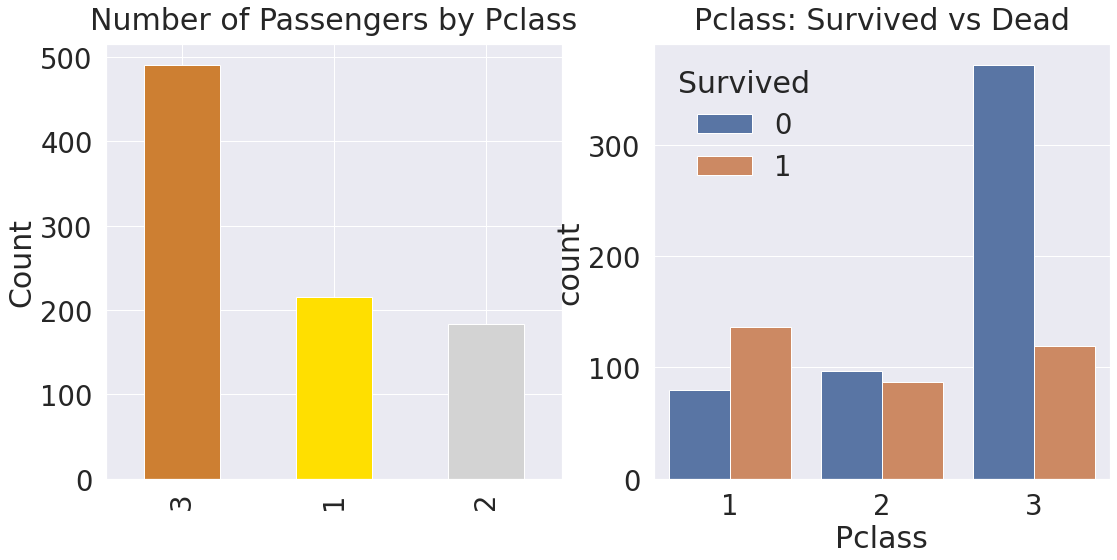

In [25]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

> Titanic were related to their social class: the chances of survival declined with social class as measured by the class in which the passenger travelled.

### 3.2 Sex

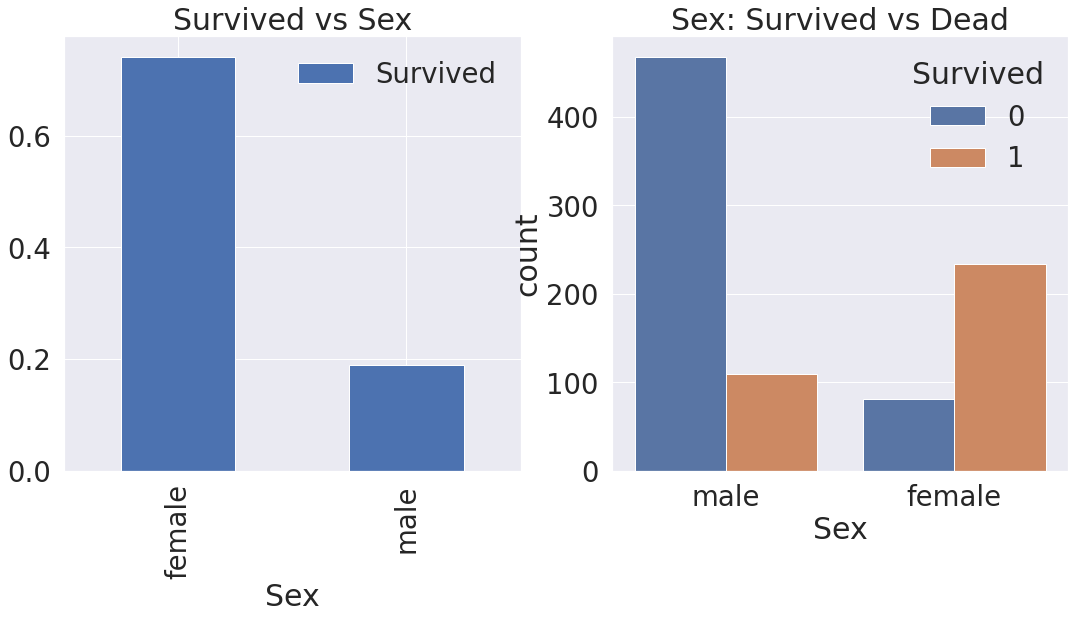

In [26]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

> The above charts show that females have been more likely to survive than males.

In [27]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


> Titanic were related to their sex: females were more likely to survive than males.

### 3.3 Age

In [28]:
print('The oldest passenger is : {:.1f} years'.format(df_train['Age'].max()))
print('The youngest passenger is : {:.1f} years'.format(df_train['Age'].min()))
print('The average age is : {:.1f} years'.format(df_train['Age'].mean()))

The oldest passenger is : 80.0 years
The youngest passenger is : 0.4 years
The average age is : 29.7 years


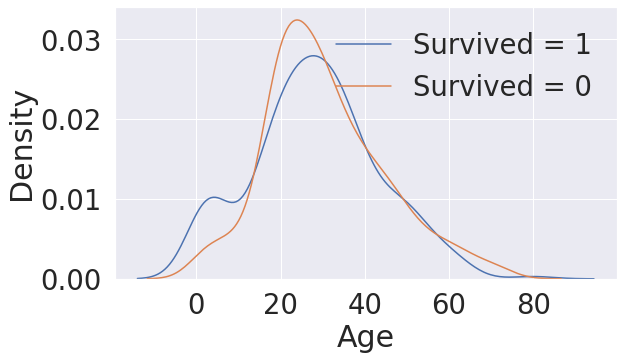

In [29]:
fix, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived = 1', 'Survived = 0'])
plt.show()

> There is a small peak in younger ages

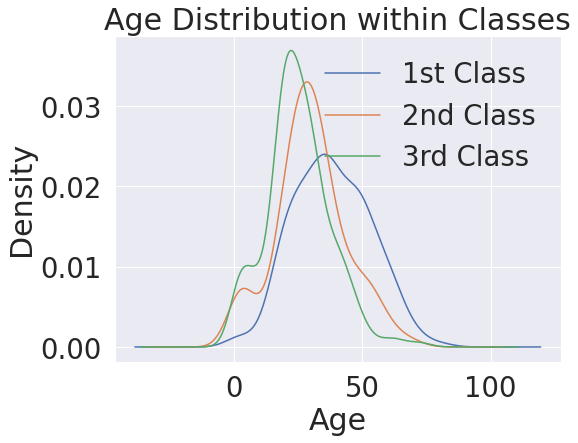

In [30]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within Classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

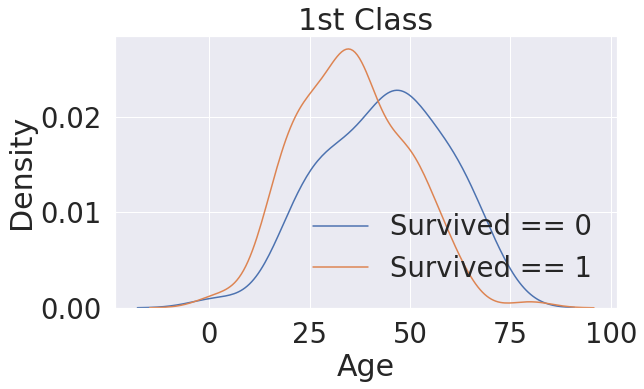

In [31]:
fix, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('1st Class')
plt.show()

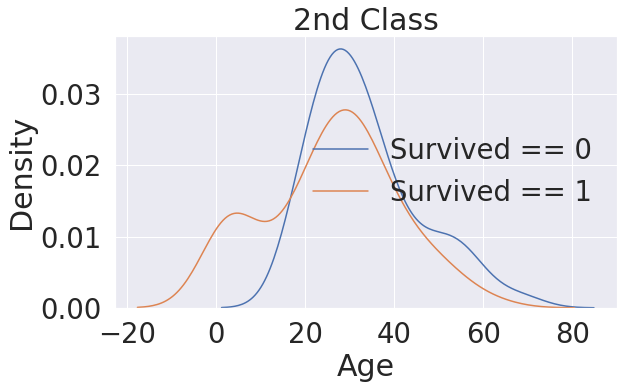

In [32]:
fix, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('2nd Class')
plt.show()

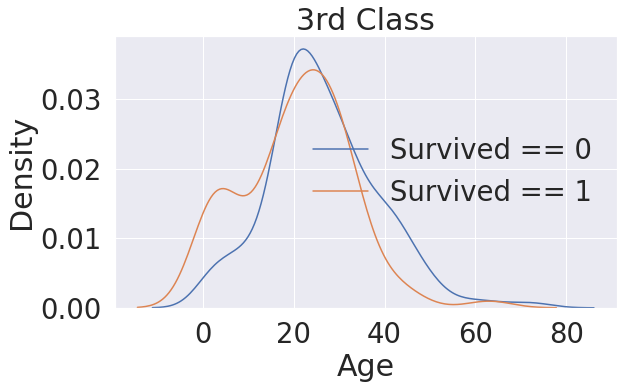

In [33]:
fix, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('3rd Class')
plt.show()

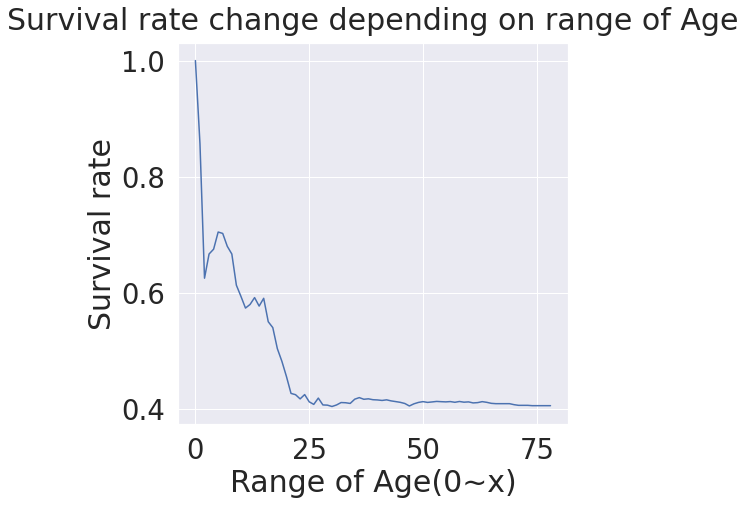

In [34]:
age_range_survival_ratio = []

for i in range(1, 80):
    age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

### 3.5 Pclass, Sex, Age

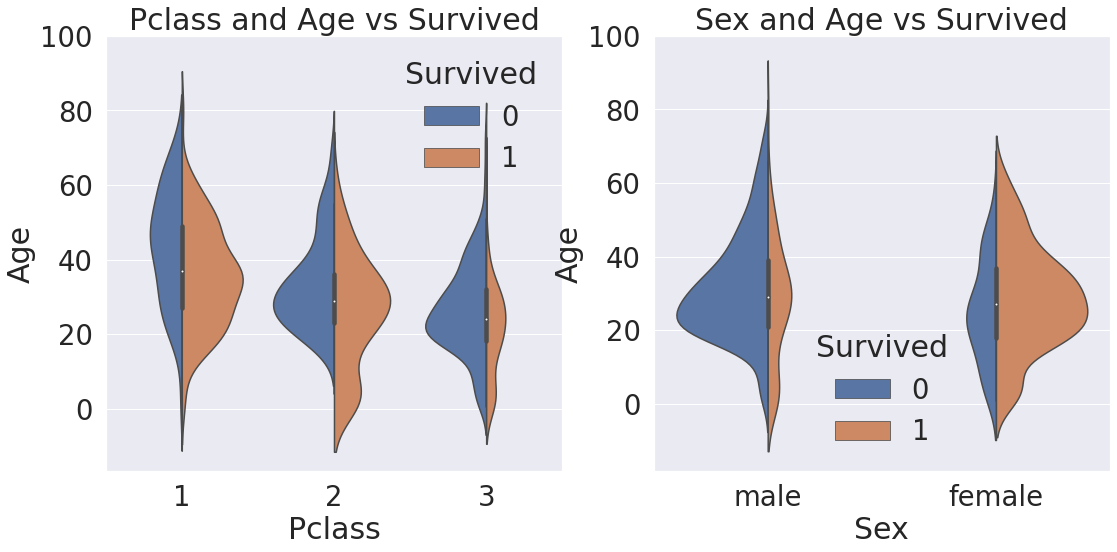

In [35]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 20))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 20))

plt.show()

### 3.6 Embarked

<AxesSubplot:xlabel='Embarked'>

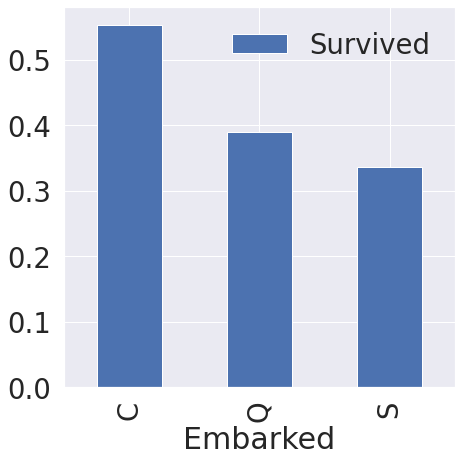

In [36]:
f, ax = plt.subplots(1,1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

> C has the highest survival rate

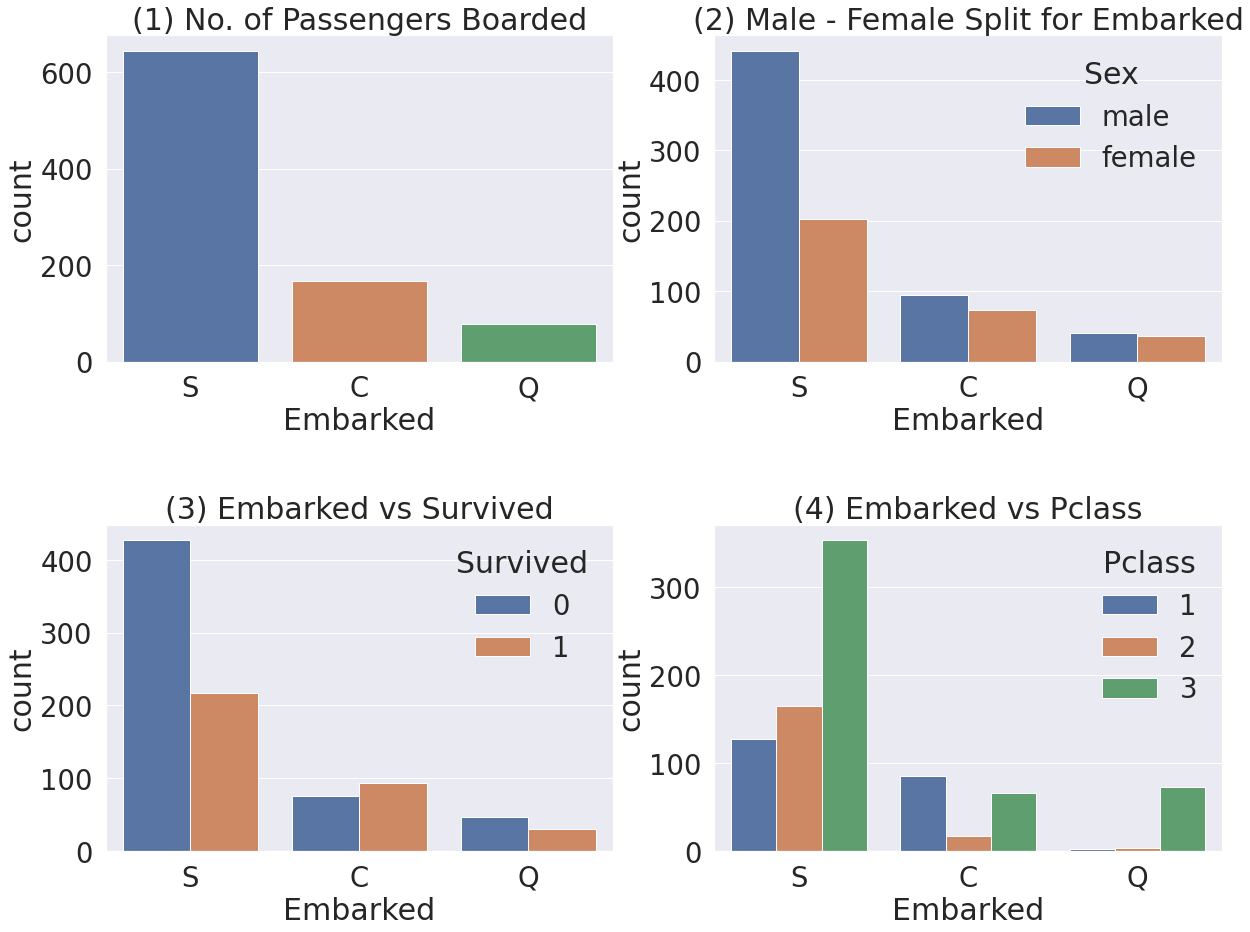

In [37]:
f, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male - Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1, 0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

> S has more passengers than C & Q
>
> C & Q has a higher rate of female population
>
> Passengers from Q and S have been more likely to be dead
>
> Since C has many female and many first class, passengers from C have been more likely to survive

### 3.7 SibSp

<AxesSubplot:xlabel='SibSp', ylabel='count'>

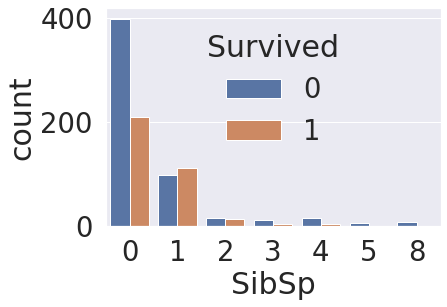

In [38]:
sns.countplot('SibSp', hue='Survived', data=df_train)

<AxesSubplot:xlabel='SibSp'>

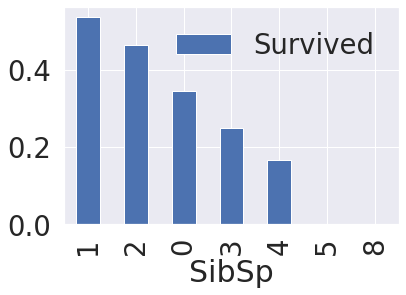

In [39]:
# Show the percentage of survival
df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

> The above chart shows that passengers with one sibling or a spouse have been more likely to survive

### 3.8 Parch

<AxesSubplot:xlabel='Parch', ylabel='count'>

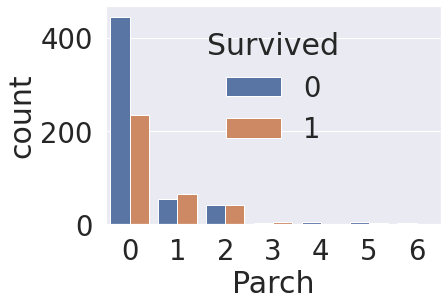

In [40]:
sns.countplot('Parch', hue='Survived', data=df_train)

<AxesSubplot:xlabel='Parch'>

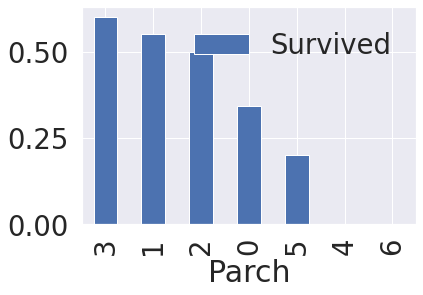

In [41]:
# Show the percentage of survival
df_train[['Parch', 'Survived']].groupby(['Parch'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

> The above chart shows that passengers aboarded with more than 2 parents or childeren have been more likely to survive - So the parents might’ve saved the kids before themselves, thus explaining the rates
>
> The above chart also shows that passengers aboarded alone have been more likely to be dead

### 3.7 Family

<AxesSubplot:>

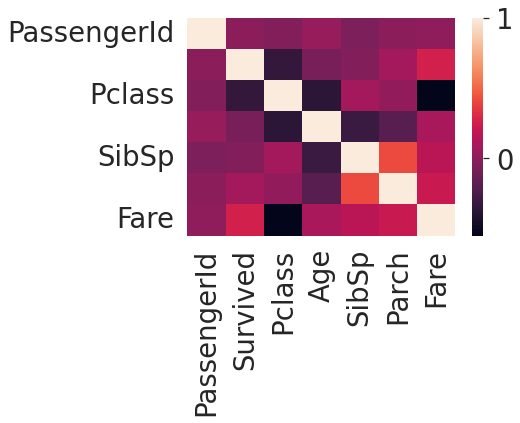

In [42]:
# Check correlation between Parch and SibSp
sns.heatmap(df_train.corr())

> We can see that Parch and SibSp has a higher correlation, which generally makes sense since Parents are more likely to travel with their multiple kids and spouses tend to travel together
>
> I decided to make a new column "FamilySize" to anlayze

In [43]:
# Create a new column "FamilySize" in trainset
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [44]:
# Also - create "FamilySize" in testset
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [45]:
# Display maximum/minimum size of family
print('Maximum size of Fmaily: ', df_train['FamilySize'].max())
print('Minimum size of Fmaily: ', df_train['FamilySize'].min())

Maximum size of Fmaily:  11
Minimum size of Fmaily:  1


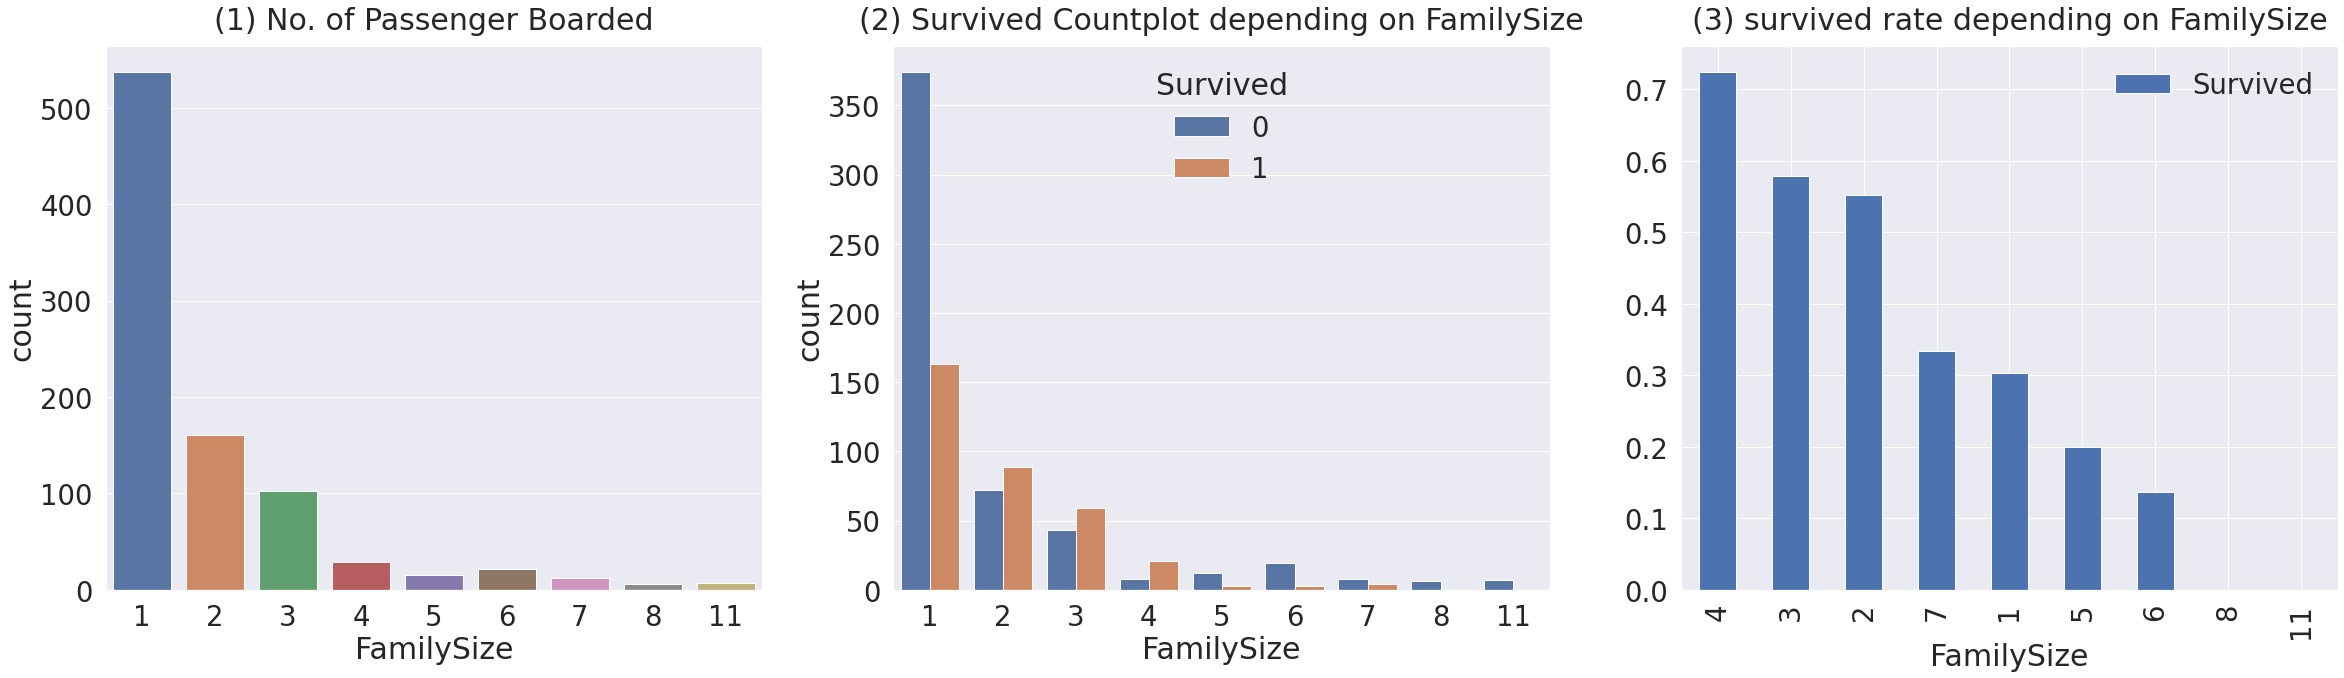

In [46]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passenger Boarded', y=1.02)

sns.countplot('FamilySize', hue = 'Survived', data = df_train, ax=ax[1])
ax[1].set_title('(2) Survived Countplot depending on FamilySize', y = 1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) survived rate depending on FamilySize', y =1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 3.8 Fare, Cabin, Ticket

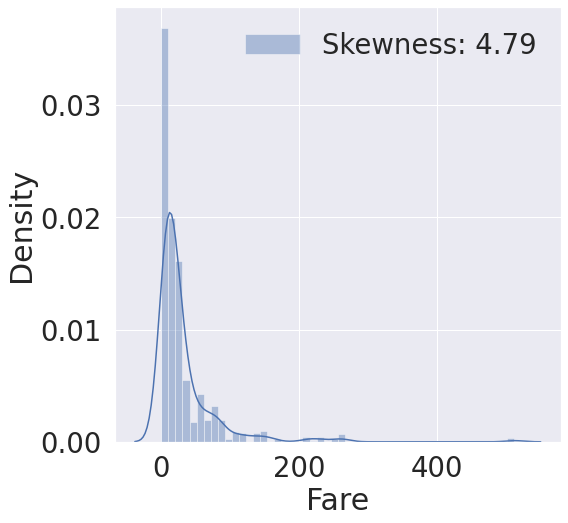

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [48]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)

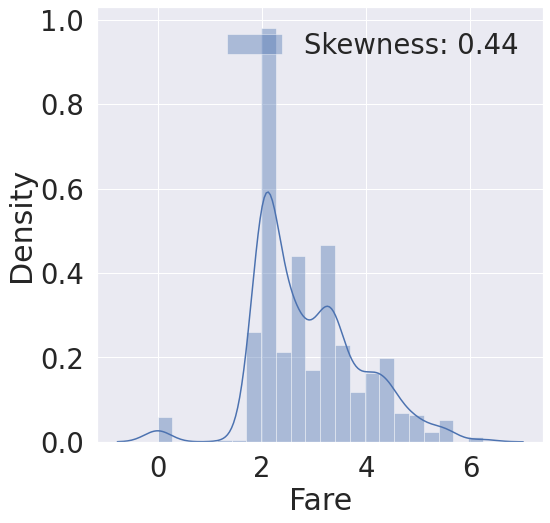

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

Because the mojority in Cabin is null, so we skip Cabin for now

In [50]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

Think about how to handle Ticket -- feature engineering

## 4. Feature Engineering
### 4.1 Age

In [51]:
# Extract Mr. Mrs. etc
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [52]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [53]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [54]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<AxesSubplot:xlabel='Initial'>

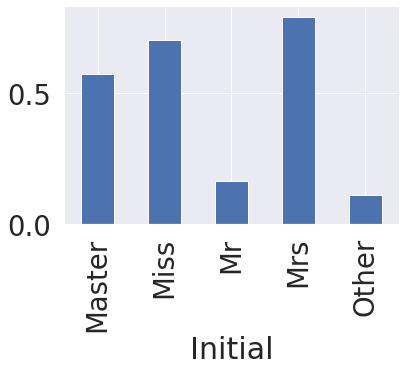

In [55]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [56]:
df_all = pd.concat([df_train, df_test])

In [57]:
df_all.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,15.442677,4.426230
Miss,616.992453,0.704301,2.332075,21.834533,0.652830,0.494340,14.021188,2.147170
Mr,658.831388,0.162571,2.359274,32.556397,0.286641,0.159533,10.003941,1.446174
Mrs,685.673367,0.795276,1.929648,37.034884,0.658291,0.824121,23.896996,2.482412
Other,714.923077,0.111111,1.615385,44.923077,0.230769,0.153846,24.523034,1.384615


In [58]:
# Fill null values
df_train.loc[(df_train['Age'].isnull())& (df_train['Initial'] == 'Mr'), 'Age'] = 33
df_train.loc[(df_train['Age'].isnull())& (df_train['Initial'] == 'Mrs'), 'Age'] = 37
df_train.loc[(df_train['Age'].isnull())& (df_train['Initial'] == 'Master'), 'Age'] = 5
df_train.loc[(df_train['Age'].isnull())& (df_train['Initial'] == 'Miss'), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull())& (df_train['Initial'] == 'Other'), 'Age'] = 45

In [59]:
df_test.loc[(df_test['Age'].isnull())& (df_test['Initial'] == 'Mr'), 'Age'] = 33
df_test.loc[(df_test['Age'].isnull())& (df_test['Initial'] == 'Mrs'), 'Age'] = 37
df_test.loc[(df_test['Age'].isnull())& (df_test['Initial'] == 'Master'), 'Age'] = 5
df_test.loc[(df_test['Age'].isnull())& (df_test['Initial'] == 'Miss'), 'Age'] = 22
df_test.loc[(df_test['Age'].isnull())& (df_test['Initial'] == 'Other'), 'Age'] = 45

Categorize Age

In [60]:
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[(70 <= df_train['Age']), 'Age_cat'] = 7

In [61]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [62]:
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [63]:
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [64]:
(df_train['Age_cat'] == df_train['Age_cat_2']).all()

True

In [65]:
df_train.drop(['Age', 'Age_cat_2'], axis = 1, inplace = True)
df_test.drop(['Age'], axis = 1, inplace = True)

## 4.2 Embarked

In [66]:
df_train['Embarked'].fillna('S', inplace=True)

In [67]:
df_train['Embarked'].isnull().sum()

0

## 4.3 Change string to categorical variable
### 4.3.1 Initial

In [68]:
df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [69]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

### 4.3.2 Embarked

In [70]:
df_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [71]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [72]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [73]:
df_train.Embarked.isnull().sum()

0

### 4.3.3 Sex

In [74]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [75]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

## 4.4 Pearson Coefficient

In [76]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

<AxesSubplot:title={'center':'Pearson Correalation of Features'}>

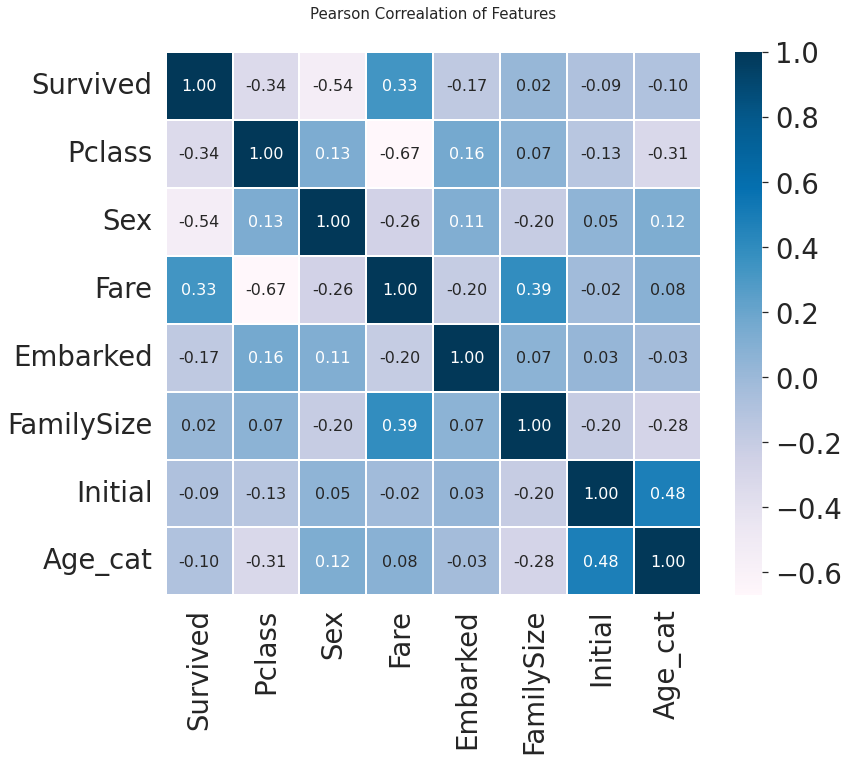

In [77]:
colormap = plt.cm.PuBu
plt.figure(figsize=(12,10))
plt.title('Pearson Correalation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=False, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':16}, fmt='.2f')

## 4.5 One-hot encoding

In [78]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')

In [79]:
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [80]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [81]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace=True)

In [82]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2.0,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3.0,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2.0,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3.0,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3.0,0,0,1,0,0,0,0,1


In [83]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,7.8292,1,3,0,0,1,0,0,0,1,0
1,3,0,7.0000,2,4,0,0,0,1,0,0,0,1
2,2,1,9.6875,1,6,0,0,1,0,0,0,1,0
3,3,1,8.6625,1,2,0,0,1,0,0,0,0,1
4,3,0,12.2875,3,2,0,0,0,1,0,0,0,1


# 5. Machine Learning (Random Forests)

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [85]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values


In [86]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

In [87]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier()

In [88]:
prediction = model.predict(X_vld)

In [89]:
print("accuracy score: ", 100*metrics.accuracy_score(prediction, y_vld))

accuracy score:  82.08955223880598


In [90]:
(prediction == y_vld).sum()/prediction.shape[0]

0.8208955223880597

# 6. Feature Importance and Prediction on Testset

In [91]:
model.feature_importances_

array([0.1024831 , 0.09827353, 0.32774897, 0.09132274, 0.12125111,
       0.01433188, 0.03818301, 0.13247137, 0.02561991, 0.00410322,
       0.01479165, 0.0130132 , 0.01640631])

In [92]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2.0,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3.0,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2.0,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3.0,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3.0,0,0,1,0,0,0,0,1


In [93]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,7.8292,1,3,0,0,1,0,0,0,1,0
1,3,0,7.0000,2,4,0,0,0,1,0,0,0,1
2,2,1,9.6875,1,6,0,0,1,0,0,0,1,0
3,3,1,8.6625,1,2,0,0,1,0,0,0,0,1
4,3,0,12.2875,3,2,0,0,0,1,0,0,0,1


In [94]:
from pandas import Series

In [95]:
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns) 

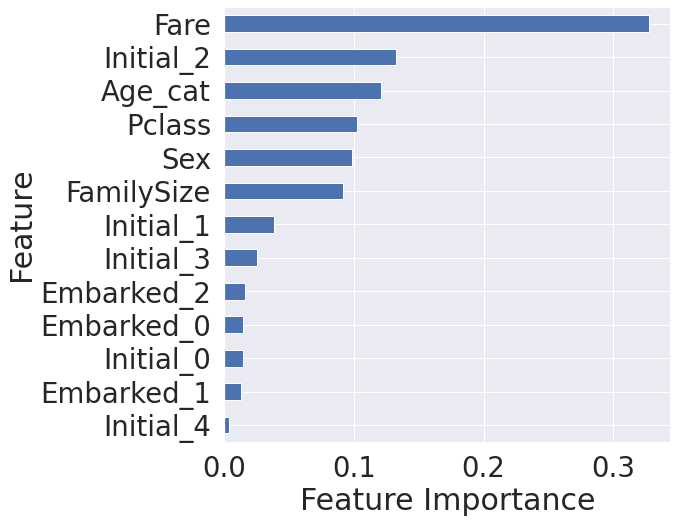

In [96]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [97]:
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [98]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
